In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

In [2]:
print(len(X_train))
print(X_train)
X_train.shape

7500
[[ 0.45267141 -1.42381257]
 [ 0.61696406 -0.00418956]
 [-1.80708012 -1.34499648]
 ...
 [ 0.63107723 -0.4743162 ]
 [-0.47320722 -0.6387028 ]
 [ 1.07909424 -1.67541279]]


(7500, 2)

In [3]:
print(len(y_train))
print(y_train)
y_train.shape

7500
[0 0 1 ... 0 1 0]


(7500,)

In [4]:
print(len(X_test))
print(X_test)

2500
[[ 1.56143766 -0.18630063]
 [-0.19754917 -0.29795513]
 [ 0.86378122 -2.17856711]
 ...
 [-1.98981714 -2.14450451]
 [ 0.93644003 -0.49672496]
 [ 1.03066534 -1.24019966]]


In [5]:
print(len(y_test))
print(y_test)

2500
[0 1 0 ... 1 0 0]


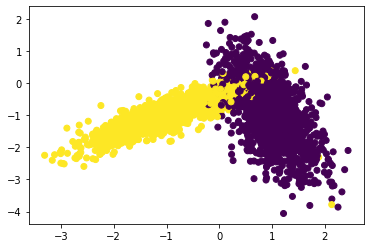

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

classifier = KNeighborsClassifier()
param_range = 50
folds = 3

def uni_rand_num(hyp_para):
    unique_num = random.sample(range(1,hyp_para),10)
    unique_num.sort()
    return unique_num
    
print(uni_rand_num(param_range))


[7, 9, 13, 18, 21, 22, 23, 34, 35, 37]


In [25]:
def x_train_to_k_folds(x_train,y_train,folds):
    Values = len(x_train)/folds
    x_train = x_train.tolist()
    y_train = y_train.tolist()
    group = []
    cls_lbl = []
    end = 0.0
    while end < len(x_train):
        group.append(x_train[int(end):int(end + Values)])
        cls_lbl.append(y_train[int(end):int(end + Values)])
        end += Values
    return group,cls_lbl

In [26]:
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    params_list = uni_rand_num(param_range)
    params = {'n_neighbour': params_list}
   
    group,cls_lbl = x_train_to_k_folds(x_train,y_train,folds)
    
    train_scores = []
    test_scores  = []    
    for k in tqdm(params['n_neighbour']):
        trainscores_folds = []
        testscores_folds  = []
        for i in range(folds):
            X_train = [group[iter] for iter in range(folds) if iter != i]
            X_train = [j for sublist in X_train for j in sublist]
            Y_train = [cls_lbl[iter] for iter in range(folds) if iter != i]
            Y_train = [j for sublist in Y_train for j in sublist]
            X_test  = group[i]
            Y_test  = cls_lbl[i]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
            
        train_scores.append(np.mean(np.array(trainscores_folds)))
        test_scores.append(np.mean(np.array(testscores_folds)))
      
    return train_scores, test_scores,params

print(RandomSearchCV(X_train,y_train,classifier, param_range, folds))




100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:18<00:00,  1.81s/it]

([1.0, 0.968, 0.9608666666666666, 0.9570666666666666, 0.9573999999999999, 0.9578000000000001, 0.9580000000000001, 0.9575999999999999, 0.9582, 0.9581333333333334], [0.9296000000000001, 0.9464, 0.9529333333333333, 0.9538666666666668, 0.9538666666666668, 0.9550666666666667, 0.9561333333333333, 0.9557333333333333, 0.9562666666666667, 0.9558666666666666], {'n_neighbour': [1, 3, 9, 22, 27, 29, 32, 33, 47, 49]})


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:18<00:00,  1.82s/it]


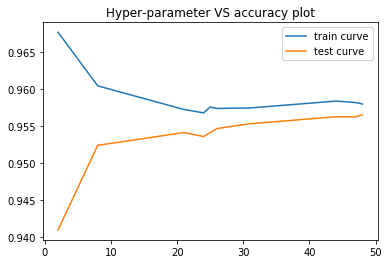

In [27]:
training_scores,CV_scores,params = RandomSearchCV(X_train,y_train,classifier, param_range, folds)

plt.plot(params['n_neighbour'] ,training_scores, label='train curve')
plt.plot(params['n_neighbour'] ,CV_scores, label='test curve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [28]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

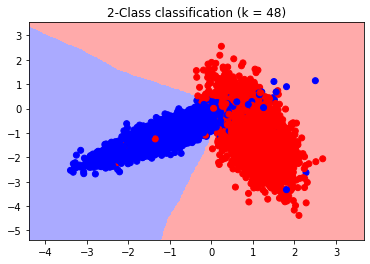

In [29]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 48)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)